In [198]:
# ne pas afficher les warnings
import warnings
warnings.filterwarnings('ignore')

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flagstats.csv', sep='\t')
df.head(2)
# change character ',' into '.' for all cells in the dataframe
df = df.astype(str).apply(lambda x: x.str.replace(',', '.'))
df.iloc[:,1:-1] = df.iloc[:,1:-1].astype(float)

filtre=['in_total_(QC-passed_reads_+_QC-failed_reads)', 'mapped', 'properly_paired', 'unmapped']
## count unmapped
df_filtred=df[df['flagstats'].isin(filtre)]

var =['flagstats', 'reference']
counts = df.columns[1:len(df.columns)-1]
# melt df
df_melt = pd.melt(df, id_vars=var, value_vars=counts, var_name='sample')
df_filtred_melt = pd.melt(df_filtred, id_vars=var, value_vars=counts, var_name='sample')
df_melt.head(2)

,flagstats,reference,sample,value
0,in_total_(QC-passed_reads_+_QC-failed_reads),assembly,pool,2862440519.0
1,secondary,assembly,pool,0.0


In [154]:
df_melt_perc = df_melt[df_melt['sample'].str.contains('%')]
df_melt_perc= df_melt_perc.loc[df_melt_perc['flagstats'] != 'in_total_(QC-passed_reads_+_QC-failed_reads)']
df_melt  = df_melt[~df_melt['sample'].str.contains('%')]

df_filtred_melt_perc = df_filtred_melt[df_filtred_melt['sample'].str.contains('%')]
df_filtred_melt_perc= df_filtred_melt_perc.loc[df_filtred_melt_perc['flagstats'] != 'in_total_(QC-passed_reads_+_QC-failed_reads)']
df_filtred_melt  = df_filtred_melt[~df_filtred_melt['sample'].str.contains('%')]

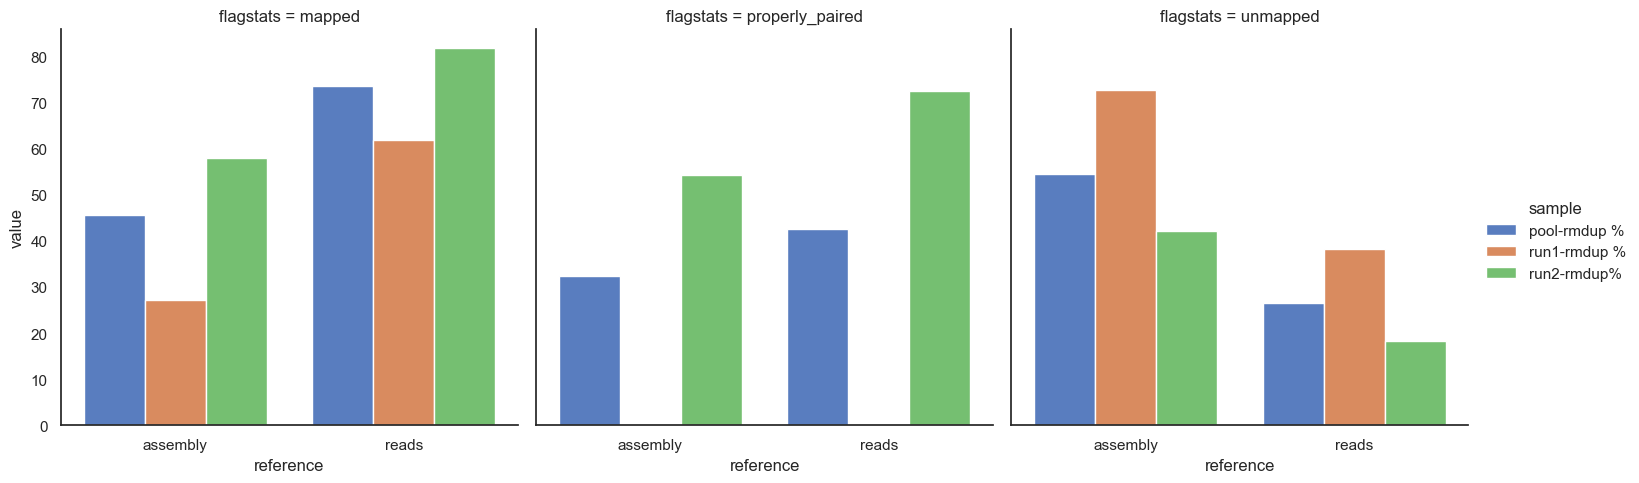

In [207]:
sns.set_style("white")
g = sns.catplot(x="reference", y="value", hue="sample", col="flagstats", data=df_filtred_melt_perc, kind="bar", palette="muted") 

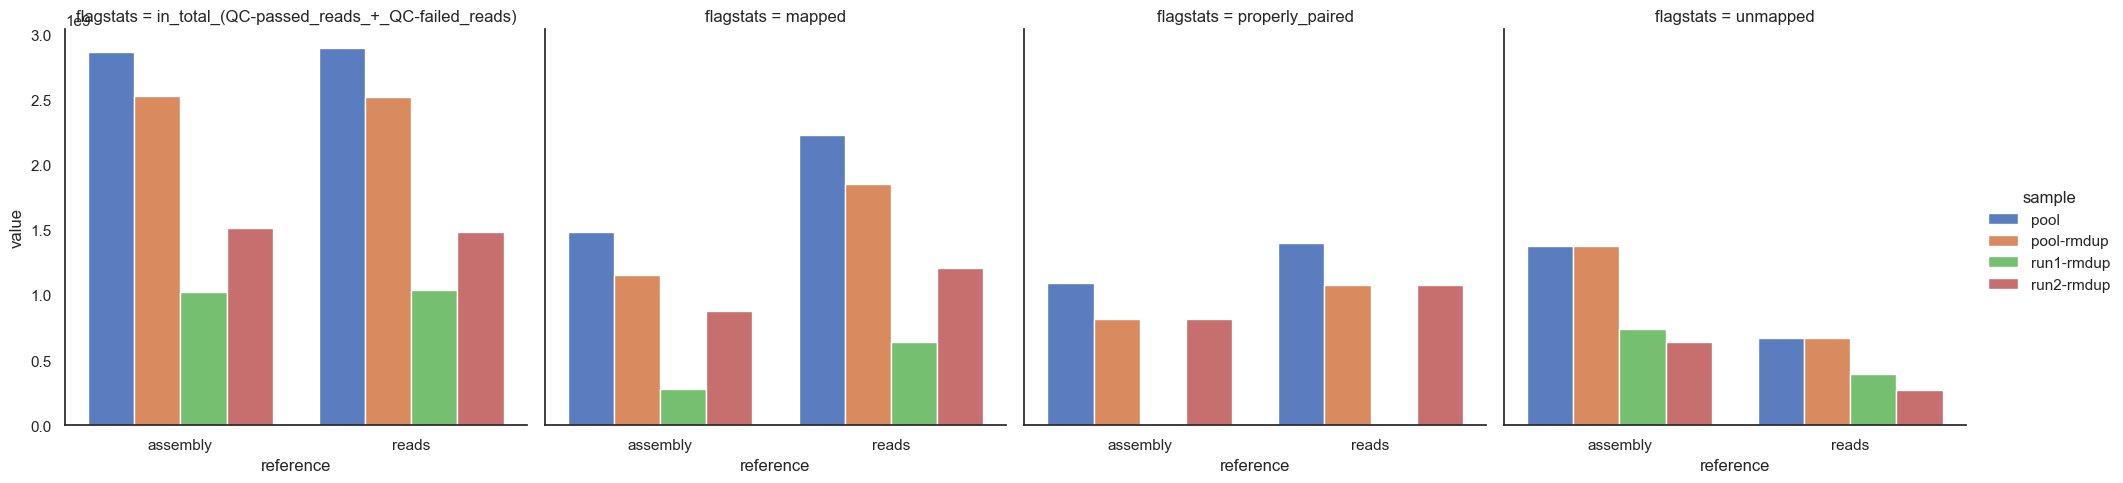

In [208]:
g = sns.catplot(x="reference", y="value", hue="sample", col="flagstats", data=df_filtred_melt, kind="bar", palette="muted") 

In [209]:
df_filtred_melt2 = df_filtred_melt.loc[df_filtred_melt['flagstats'] != 'in_total_(QC-passed_reads_+_QC-failed_reads)',:]

Text(0.5, 0.98, 'Stacked Barplot of Flagstats')

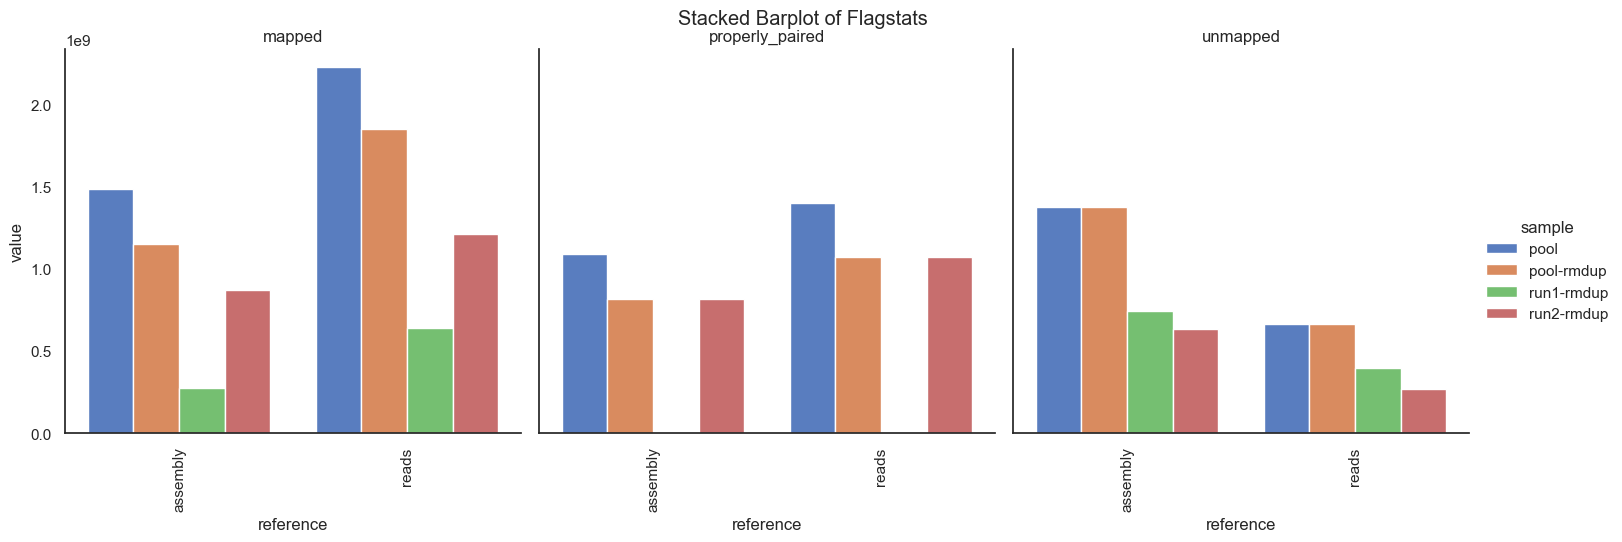

In [210]:
# catplot kind bar plot stacked values for flagstats
# catplot kind bar plot stacked values for flagstats
g = sns.catplot(x="reference", y="value", hue="sample", col="flagstats", data=df_filtred_melt2, kind="bar", palette="muted", estimator=sum, ci=None)
g.set_xticklabels(rotation=90)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Stacked Barplot of Flagstats')


<AxesSubplot:xlabel='reference', ylabel='value'>

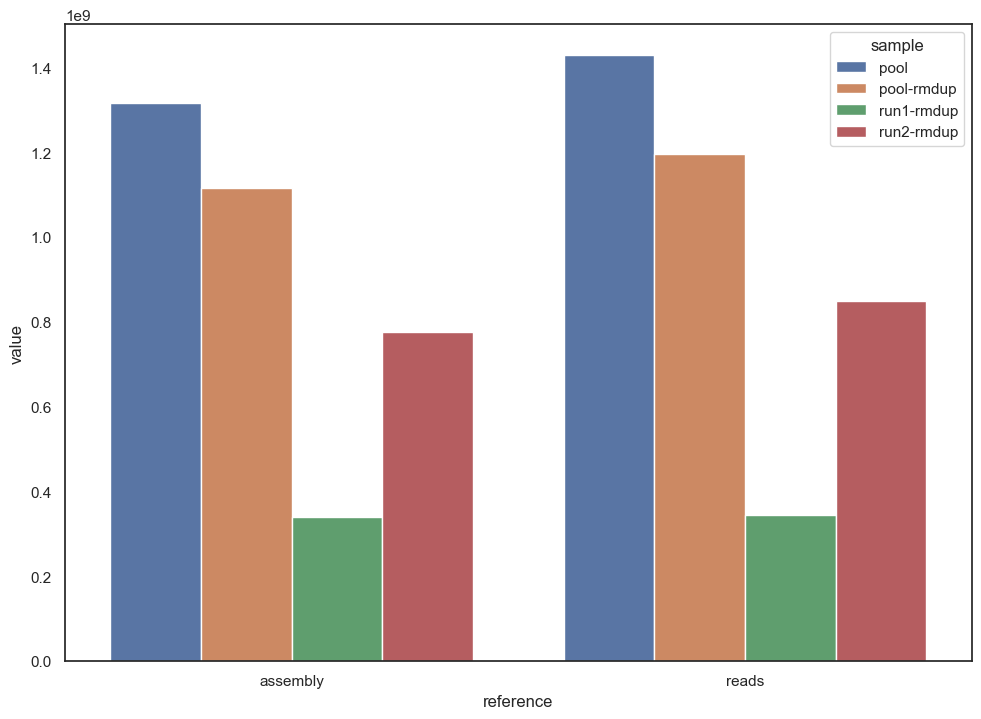

In [206]:
sns.set_style("white")
sns.barplot(x="reference", y="value", hue="sample", data=df_filtred_melt2, ci=None)


In [167]:
# pivot df_filtred_melt2
df_filtred_melt2_pivot = df_filtred_melt2.pivot_table(index=['reference', 'sample'], columns='flagstats', values='value', aggfunc=sum)
df_filtred_melt2_pivot.reset_index(inplace=True)

flagstats                   mapped  properly_paired      unmapped
reference sample                                                 
assembly  pool        1.485571e+09     1.087433e+09  1.376869e+09
          pool-rmdup  1.149624e+09     8.181913e+08  1.376869e+09
          run1-rmdup  2.768282e+08     0.000000e+00  7.415899e+08
          run2-rmdup  8.745700e+08     8.181859e+08  6.352804e+08
reads     pool        2.224523e+09     1.399811e+09  6.663838e+08
          pool-rmdup  1.850118e+09     1.071690e+09  6.663838e+08
          run1-rmdup  6.414662e+08     0.000000e+00  3.967177e+08
          run2-rmdup  1.209348e+09     1.071685e+09  2.696662e+08

In [260]:
df_filtred_melt2_pivot


flagstats,index,reference,sample,mapped,properly_paired,unmapped
0,0,assembly,pool,1.485571e+09,1.087433e+09,1.376869e+09
1,1,assembly,pool-rmdup,1.149624e+09,8.181913e+08,1.376869e+09
2,2,assembly,run1-rmdup,2.768282e+08,0.000000e+00,7.415899e+08
3,3,assembly,run2-rmdup,8.745700e+08,8.181859e+08,6.352804e+08
4,4,reads,pool,2.224523e+09,1.399811e+09,6.663838e+08
5,5,reads,pool-rmdup,1.850118e+09,1.071690e+09,6.663838e+08
6,6,reads,run1-rmdup,6.414662e+08,0.000000e+00,3.967177e+08
7,7,reads,run2-rmdup,1.209348e+09,1.071685e+09,2.696662e+08


In [263]:
t = df_filtred_melt.loc[df_filtred_melt['flagstats'] == 'in_total_(QC-passed_reads_+_QC-failed_reads)', :].drop('flagstats', axis=1).rename(columns={'value': 'total'})
df_filtred_melt2_pivot_total= df_filtred_melt2_pivot.merge(t)

In [281]:
df_filtred_melt2_pivot_total

,index,reference,sample,mapped,properly_paired,unmapped,total
0,0,assembly,pool,1.485571e+09,1.087433e+09,1.376869e+09,2862440519.0
1,1,assembly,pool-rmdup,1.149624e+09,8.181913e+08,1.376869e+09,2526493408.0
2,2,assembly,run1-rmdup,2.768282e+08,0.000000e+00,7.415899e+08,1018418051.0
3,3,assembly,run2-rmdup,8.745700e+08,8.181859e+08,6.352804e+08,1509850440.0
4,4,reads,pool,2.224523e+09,1.399811e+09,6.663838e+08,2890907118.0
5,5,reads,pool-rmdup,1.850118e+09,1.071690e+09,6.663838e+08,2516501805.0
6,6,reads,run1-rmdup,6.414662e+08,0.000000e+00,3.967177e+08,1038183956.0
7,7,reads,run2-rmdup,1.209348e+09,1.071685e+09,2.696662e+08,1479013780.0


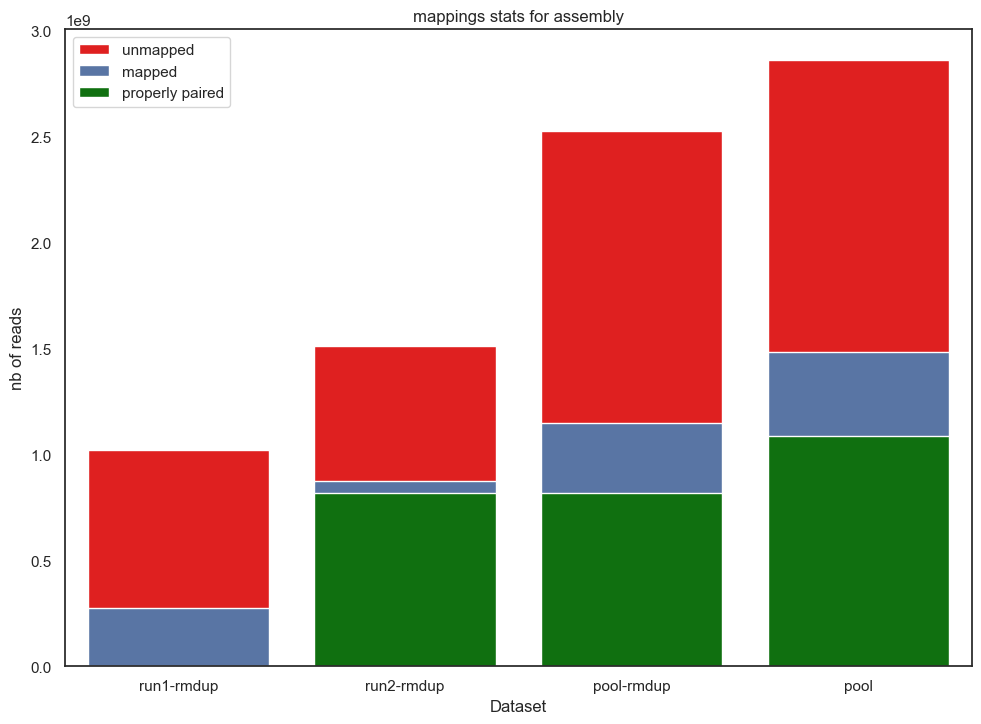

In [283]:
reference = 'assembly'
tmp = df_filtred_melt2_pivot_total.loc[df_filtred_melt2_pivot_total.reference ==reference, :]


#reorganiser l'order des samples pour avoir run1-rmdup, run2-rmdup, pool-rmdup, pool
tmp['sample'] = pd.Categorical(tmp['sample'], ['run1-rmdup', 'run2-rmdup', 'pool-rmdup', 'pool'])

# Create the stacked barplot
sns.barplot(x='sample', y='total', data=tmp, color='red', label='unmapped')
sns.barplot(x='sample', y='mapped', data=tmp, color='b', label='mapped')
sns.barplot(x='sample', y='properly_paired', data=tmp, color='green', label='properly paired')


plt.xlabel('Dataset')
plt.ylabel('nb of reads')
plt.title('mappings stats for ' + reference)
plt.legend()  # Show legend

# Show the plot
plt.show()

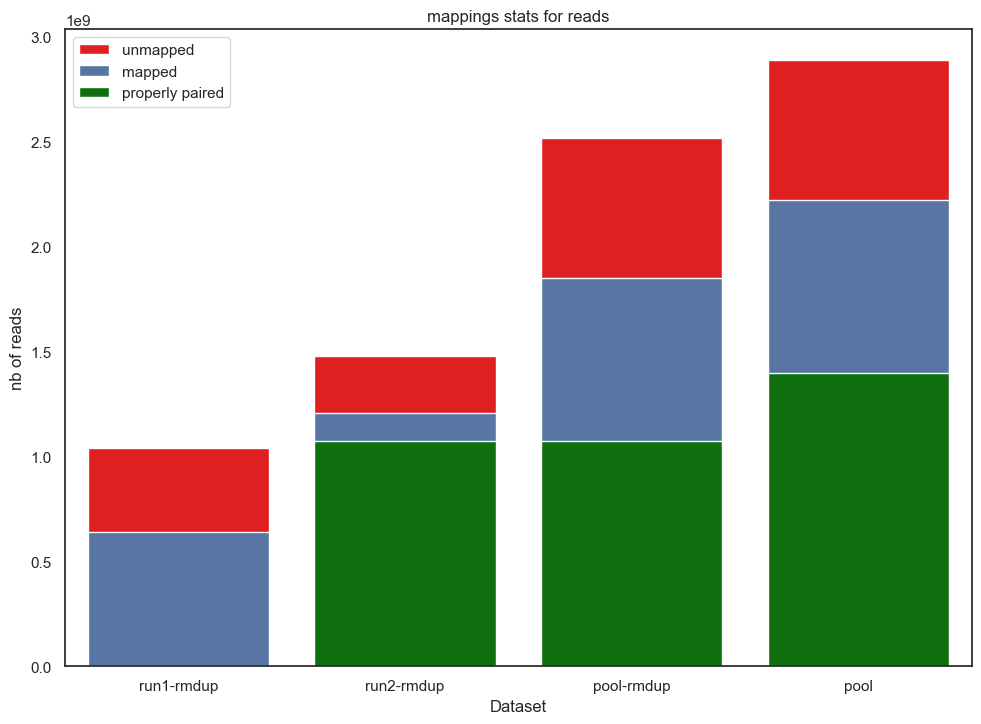

In [287]:
reference = 'reads'
tmp = df_filtred_melt2_pivot_total.loc[df_filtred_melt2_pivot_total.reference ==reference, :]


#reorganiser l'order des samples pour avoir run1-rmdup, run2-rmdup, pool-rmdup, pool
tmp['sample'] = pd.Categorical(tmp['sample'], ['run1-rmdup', 'run2-rmdup', 'pool-rmdup', 'pool'])

# Create the stacked barplot
sns.barplot(x='sample', y='total', data=tmp, color='red', label='unmapped')
sns.barplot(x='sample', y='mapped', data=tmp, color='b', label='mapped')
sns.barplot(x='sample', y='properly_paired', data=tmp, color='green', label='properly paired')


plt.xlabel('Dataset')
plt.ylabel('nb of reads')
plt.title('mappings stats for ' + reference)
plt.legend()  # Show legend

# Show the plot
plt.show()

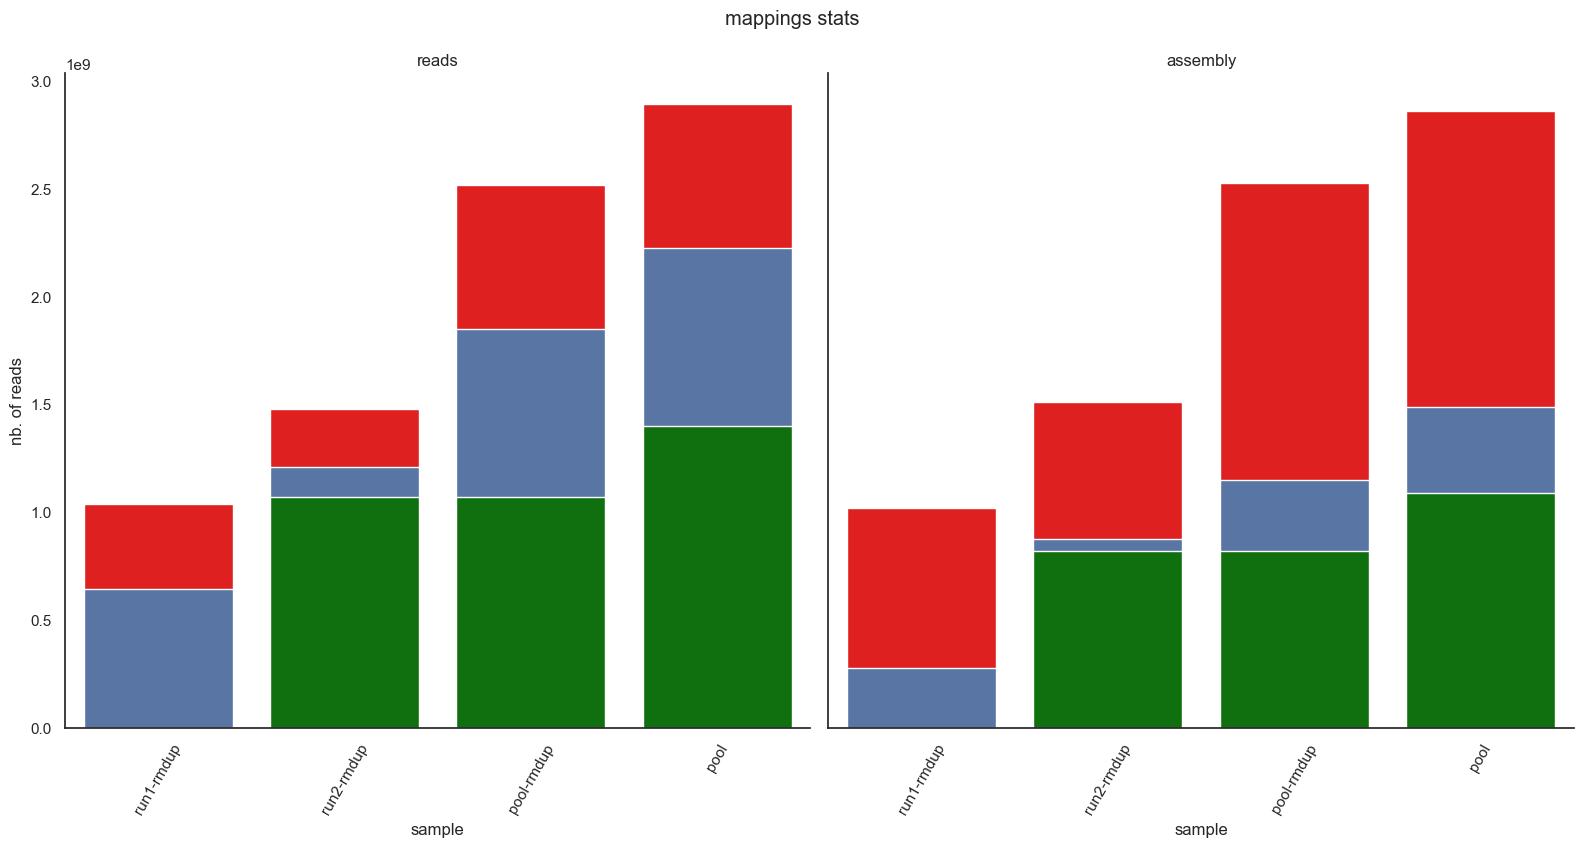

In [291]:
# facetgrid for two plots according to reference
# inverse order of reference on plot 
df_filtred_melt2_pivot_total['reference'] = pd.Categorical(df_filtred_melt2_pivot_total['reference'], ['reads', 'assembly'])
df_filtred_melt2_pivot_total['sample'] = pd.Categorical(df_filtred_melt2_pivot_total['sample'], ['run1-rmdup', 'run2-rmdup', 'pool-rmdup', 'pool'])

g = sns.FacetGrid(df_filtred_melt2_pivot_total, col="reference", height=8, aspect=1)
g.map(sns.barplot, "sample", "total", color="red", label='unmapped')
g.map(sns.barplot, "sample", "mapped", color="b")
g.map(sns.barplot, "sample", "properly_paired", color="green")
g.set_xticklabels(rotation=60)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('mappings stats')
g.set_ylabels('nb. of reads')

# Show the plot
plt.show()